In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")

# Display the data table for preview
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
mice_df = combined_results_df["Mouse ID"].nunique()
mice_df

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_results_df.groupby(["Mouse ID", "Timepoint"]).count()
duplicates.sort_values(["Sex"], ascending=False)

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
...                          ...  ...         ...         ...   
i334     20                    1    1           1           1   
         15                    1    1           1           1   
         10                    1    1           1           1   
         5                     1    1           1           1   
z969     45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
...                                ...               ...  
i334     20                          1                 1  
         15                          1                 1  
         10                          1                 1  
         5                           1                 1  
z969     45                          1                 1  

[1888 rows x 6 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = combined_results_df[combined_results_df["Mouse ID"]=="g989"]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_results_df[combined_results_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df = clean_df["Mouse ID"].nunique()
clean_mice_df

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_df.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
tumor_median = clean_df.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)']
tumor_var = clean_df.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
tumor_stdev = clean_df.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
tumor_sem = clean_df.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({"Mean Tumor Volume" : tumor_mean,
                          "Median Tumor Volume" : tumor_median,
                          "Tumor Volume Variance" : tumor_var,
                          "Tumor Volume Std. Dev." : tumor_stdev,
                          "Tumor Volume Std. Err." : tumor_sem})
summary_df.head()

# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df_two = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_df_two

# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts 

Text(0, 0.5, 'Number of Data Points')

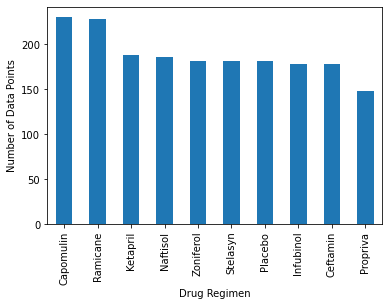

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_chart = clean_df["Drug Regimen"].value_counts().plot(kind="bar")

# Set labels for x & y axis 
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Data Points")



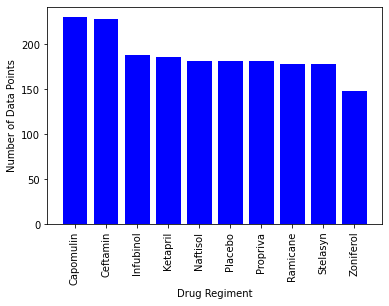

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Calculate the number of data points for each drug regiment 
counts = clean_df["Drug Regimen"].value_counts()

# Setting the x-axis to the length of the counts series 
x_axis = np.arange(len(counts))

# Generate a bar plot 
plt.bar(x_axis, counts, color="b", alpha=1, align="center")
# rotation='vertical'

# Tick marks 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation='vertical')

#plt.title()
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Data Points")

# Display resulting plot 
plt.show()


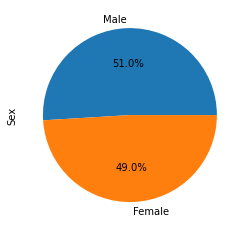

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_chart = clean_df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", shadow=False)




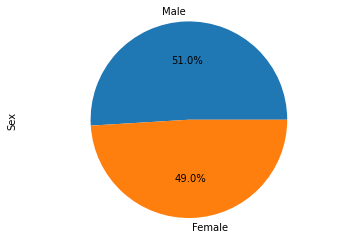

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Distribution_by_sex = clean_df["Sex"].value_counts()

plt.pie(Distribution_by_sex, labels=Distribution_by_sex.index.values, autopct="%1.1f%%", shadow=False)
plt.ylabel("Sex")

plt.axis("equal")
plt.show()

# Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
total_tumor_volume = clean_df.groupby(["Drug Regimen"]).sum()['Tumor Volume (mm3)']

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_timepoint_df = max_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_timepoint_df.merge(clean_df, on=["Mouse ID","Timepoint"], how="left")
merged_df.head(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments: 
    volume = merged_df["Drug Regimen"] == treatment
    vol_data = merged_df.loc[volume, "Tumor Volume (mm3)"]
   # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = vol_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    tumor_vol_data.append(vol_data)
    # Find the up
    lower_bound = lowerq - (1.5*iqr) 
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = vol_data.loc[(vol_data < lower_bound) | (vol_data > upper_bound)]
    print(f" {treatment} potential outliers: {outliers}")

    

 Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


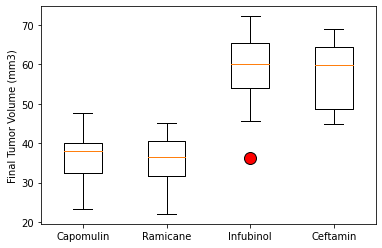

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_coloring = dict(markerfacecolor = "r", markersize = 12)
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = box_coloring)

#plt.xlabel("Final Tumor Volume across four regiments")

plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

# Line and Scatter Plots

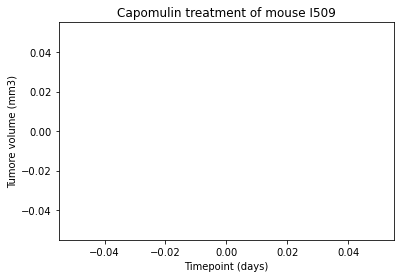

In [73]:
# # Find the mouse treated with Capomulin
# mouse = clean_df.loc[clean_df["Mouse ID"] == "I509"]

# # Generate a line plot of time point versus tumor volume for this mouse treated with Capomulin
# plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"]) 
 
# plt.xlabel("Timepoint (days)")
# plt.ylabel("Tumore volume (mm3)")
# plt.title("Capomulin treatment of mouse I509")

# plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


# Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
